<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/tworzenie_modelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zawartość pliku catsdogs.zip została rozpakowana do katalogu dataset
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6375 - loss: 10.1483

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6000 - loss: 13.3146 - val_accuracy: 0.5000 - val_loss: 5.7138
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4750 - loss: 4.0500 - val_accuracy: 0.5000 - val_loss: 4.7257
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5667 - loss: 2.3489 - val_accuracy: 0.5000 - val_loss: 7.3554
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5167 - loss: 5.0088 - val_accuracy: 0.5000 - val_loss: 2.0762
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6521 - loss: 1.8805 - val_accuracy: 0.5000 - val_loss: 1.5549
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5542 - loss: 1.1627 - val_accuracy: 0.5250 - val_loss: 3.2261
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6792 - loss: 1.3331 - val_accuracy: 0.5000 - val_loss: 2.9866
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6625 - loss: 1.4079 - val_accuracy: 0.5000 - val_loss: 2.7381
Epoch 9/10
2/2 ━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step
Macierz konfuzji:
[[18  2]
 [18  2]]

Raport klasyfikacji:
              precision    recall  f1-score   support

        cats       0.50      0.90      0.64        20
        dogs       0.50      0.10      0.17        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.40        40
weighted avg       0.50      0.50      0.40        40



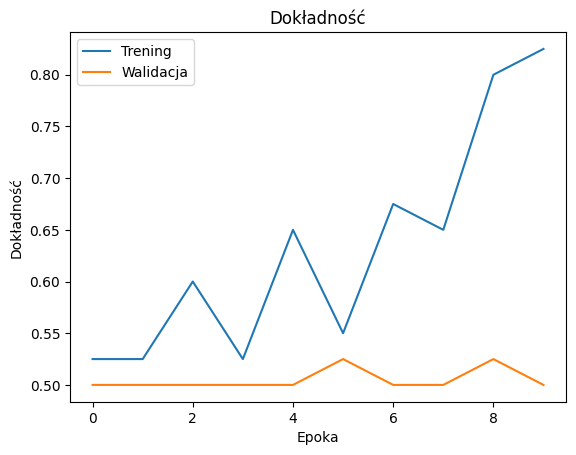

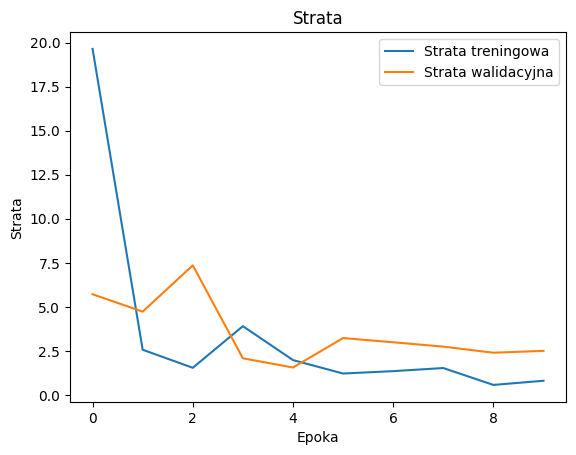

In [1]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Ścieżki
zip_file_path = 'catsdogs.zip'  # Ścieżka do pliku ZIP w katalogu dataset
extract_to_dir = 'dataset'            # Katalog, do którego rozpakowujemy

# Rozpakowanie archiwum ZIP do katalogu dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)
print(f"Zawartość pliku {zip_file_path} została rozpakowana do katalogu {extract_to_dir}")

# Ścieżki do danych treningowych i walidacyjnych
train_dir = os.path.join(extract_to_dir, 'train')
validation_dir = os.path.join(extract_to_dir, 'validation')

# Przygotowanie danych
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False
)

# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trening modelu
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Zapis modelu
model.save('cats_and_dogs_cnn_model.h5')

# Predykcja na zbiorze walidacyjnym
validation_generator.reset()  # Resetujemy generator walidacyjny, aby upewnić się, że dane są w odpowiedniej kolejności
y_pred = (model.predict(validation_generator) > 0.5).astype("int32")  # Ostateczne klasy (0 lub 1)
y_true = validation_generator.classes  # Faktyczne klasy

# Macierz konfuzji
conf_matrix = confusion_matrix(y_true, y_pred)
print("Macierz konfuzji:")
print(conf_matrix)

# Raport klasyfikacji
report = classification_report(y_true, y_pred, target_names=list(validation_generator.class_indices.keys()))
print("\nRaport klasyfikacji:")
print(report)

# Wizualizacja wyników treningu
# Dokładność
plt.plot(history.history['accuracy'], label='Trening')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# Wizualizacja strat
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Strata')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()
